<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/3.%20MinMax%20Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 MinMaxScaler (Normalization)

The `MinMaxScaler` transforms features by scaling each one to a **fixed range, usually [0, 1]**.

#### <u>Mathematical Formula</u>

$$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Where:

- $x$: Original value  
- $x_{\text{min}}$, $x_{\text{max}}$: Minimum and maximum of the feature  
- $x'$: Scaled value (between 0 and 1)

#### <u>When to Use `MinMaxScaler` ?</u>

- When feature values need to be bounded, e.g., in neural networks.
- When the data is not normally distributed (bell-shaped).
- When data has no significant outliers.
- Useful in image processing, clustering (K-Means), and deep learning.

#### <u>Effect on Data</u>

- All values are rescaled into the [0, 1] range.  
- Sensitive to outliers: can distort the scale if extreme values are present.  
- Does not change the distribution shape — only rescales the values.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
X.shape

(20640, 8)

In [6]:
X = X.iloc[:,:-2]

In [7]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [8]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [9]:
y.shape

(20640,)

**Recommended Practice:**

- Scaling before splitting leaks information from the test set into the scaler.

- This violates the principle of no peeking into the test set.

- It can lead to overfitting and unrealistic performance estimates.

So, we shall now split the dataset before we scale it.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

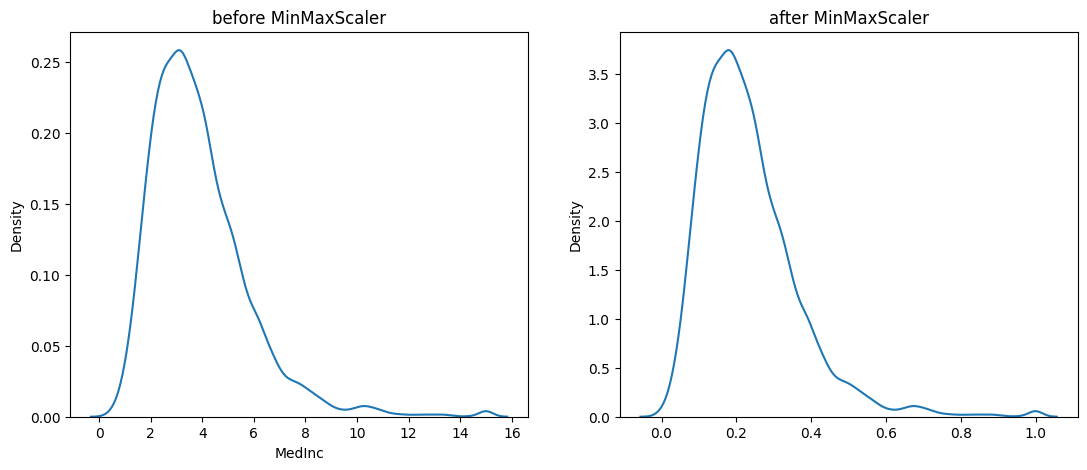

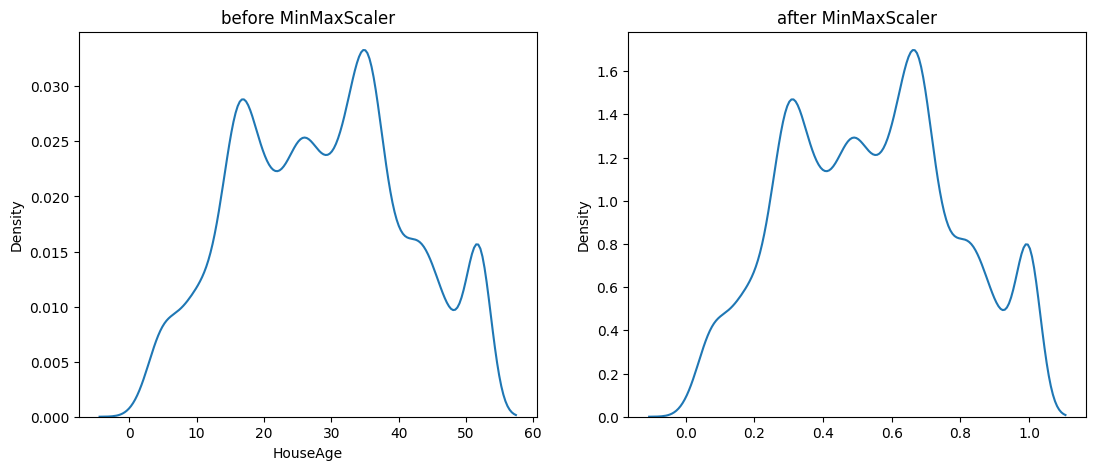

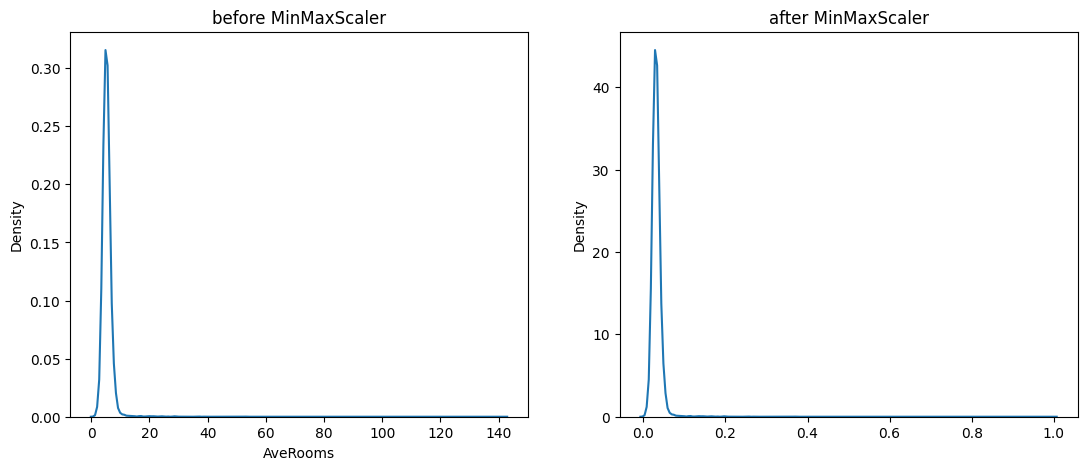

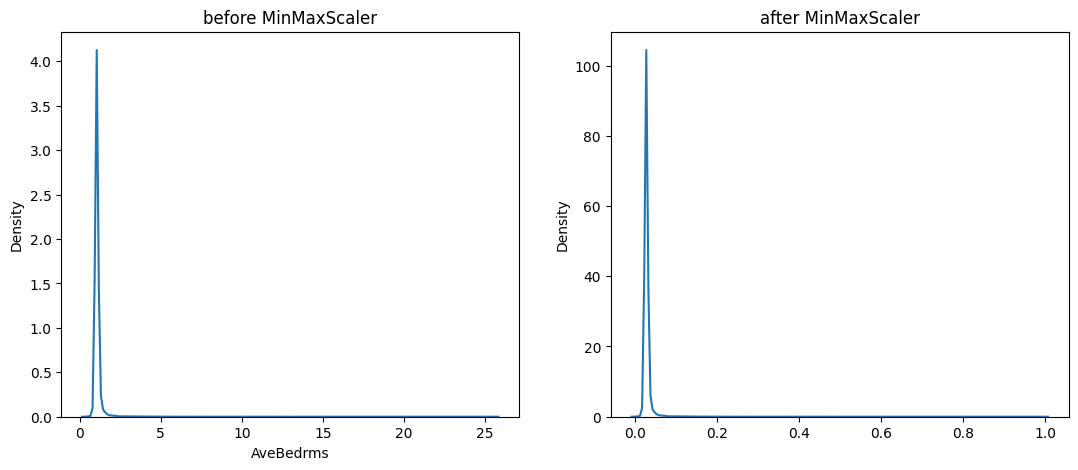

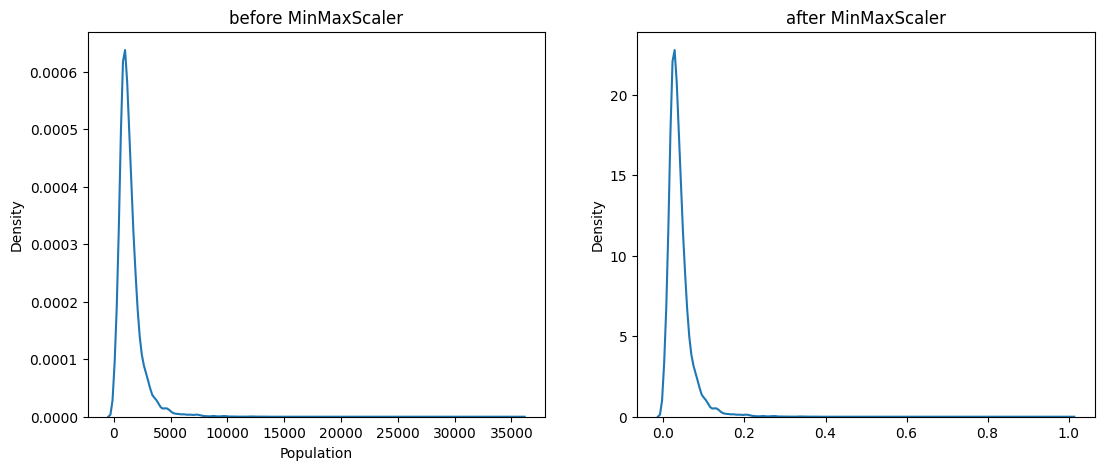

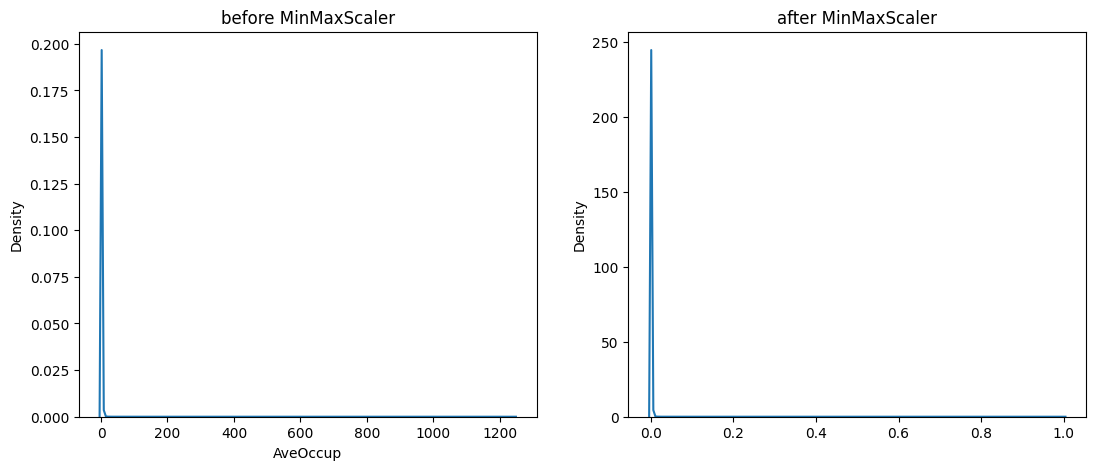

In [12]:
for col in x_train.columns:
  plots(x_train, col, MinMaxScaler())

Further, we shall follow a similar approach as we did with `StandardScaler`, evaluating the effect of `MinMaxScaler` using both a **linear model** and a **non-linear model**.


In [13]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', MinMaxScaler()),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

In [14]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Print accuracy scores
print(f"{'Model':<25} {'Unscaled R²':<15} {'Scaled R²'}")
print("-" * 55)
for name, model in models.items():
    unscaled_score = model_accuracy_unscaled(model)
    scaled_score = model_accuracy_scaled(model)
    print(f"{name:<25} {unscaled_score:<15.4f} {scaled_score:.4f}")

Model                     Unscaled R²     Scaled R²
-------------------------------------------------------
Linear Regression         0.5099          0.5099
KNN Regressor             0.1609          0.5076
SVR                       -0.0166         0.5498
Random Forest             0.6775          0.6775


#### Conclusion:-

- **KNN** and **SVR** showed **substantial improvement** in performance after applying `MinMaxScaler`, confirming that these **non-linear, distance/kernel-based models are highly sensitive to feature scaling**.
- **Linear Regression** performance remained unchanged, which is expected because it is **not affected much by scale** unless regularization is involved.
- **Random Forest** was **unaffected** by scaling, as it's a **tree-based model** that splits based on thresholds rather than distances.
